# Task
Analyze the "insurance.csv" dataset by implementing and comparing Multi Regression, Lasso Regression, and Ridge Regression models to predict insurance charges, including data preprocessing, model training, evaluation with performance metrics, and visualization of results.

## Load and Inspect Data

### Subtask:
Load the insurance.csv dataset into a pandas DataFrame and perform an initial inspection to understand its structure and content.


**Reasoning**:
Load the dataset, display its head, info, and descriptive statistics to understand its structure and content as requested.



In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Descriptive Statistics:
               a

## Preprocess Data

### Subtask:
Handle categorical features using one-hot encoding, define features (X) and target (y) variables, and split the dataset into training and testing sets. Also, scale numerical features to prepare for modeling.


**Reasoning**:
First, I will separate the features (X) and the target (y), apply one-hot encoding to the categorical features, and then split the data into training and testing sets. This will prepare the data for the next step of scaling.



In [2]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# 2. Identify and apply one-hot encoding to categorical columns
categorical_cols = ['sex', 'smoker', 'region']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Split the processed X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train after encoding and splitting:")
print(X_train.head())

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)

First 5 rows of X_train after encoding and splitting:
      age    bmi  children  sex_male  smoker_yes  region_northwest  \
560    46  19.95         2     False       False              True   
1285   47  24.32         0     False       False             False   
1142   52  24.86         0     False       False             False   
969    39  34.32         5     False       False             False   
486    54  21.47         3     False       False              True   

      region_southeast  region_southwest  
560              False             False  
1285             False             False  
1142              True             False  
969               True             False  
486              False             False  


**Reasoning**:
Now that the data is split into training and testing sets, I will scale the numerical features ('age', 'bmi', 'children') using StandardScaler to ensure they have similar ranges, which is important for many machine learning algorithms.



In [3]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
numerical_cols = ['age', 'bmi', 'children']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on X_train numerical columns and transform both X_train and X_test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("First 5 rows of X_train after numerical scaling:")
print(X_train.head())
print("\nFirst 5 rows of X_test after numerical scaling:")
print(X_test.head())

First 5 rows of X_train after numerical scaling:
           age       bmi  children  sex_male  smoker_yes  region_northwest  \
560   0.472227 -1.756525  0.734336     False       False              True   
1285  0.543313 -1.033082 -0.911192     False       False             False   
1142  0.898745 -0.943687 -0.911192     False       False             False   
969  -0.025379  0.622393  3.202629     False       False             False   
486   1.040918 -1.504893  1.557100     False       False              True   

      region_southeast  region_southwest  
560              False             False  
1285             False             False  
1142              True             False  
969               True             False  
486              False             False  

First 5 rows of X_test after numerical scaling:
           age       bmi  children  sex_male  smoker_yes  region_northwest  \
764   0.401140 -0.891539  0.734336     False       False             False   
887  -0.238638 -0.0

## Implement Multi Regression

### Subtask:
Train a standard Linear Regression (Multi Regression) model using the preprocessed training data and evaluate its performance on the test set.


**Reasoning**:
To implement Multi Regression, I will import `LinearRegression`, instantiate the model, train it with the preprocessed training data (`X_train`, `y_train`), and then make predictions on the test data (`X_test`), storing the results in `y_pred_lr`.



In [4]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_reg_model.predict(X_test)

print("Linear Regression model trained and predictions made.")
print(f"First 5 predictions: {y_pred_lr[:5]}")

Linear Regression model trained and predictions made.
First 5 predictions: [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]


**Reasoning**:
Now that the Linear Regression model is trained and predictions have been made, I will evaluate its performance using common regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.



In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n--- Linear Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")


--- Linear Regression Model Evaluation ---
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2): 0.78


## Implement Lasso Regression

### Subtask:
Train a Lasso Regression model using the preprocessed training data and evaluate its performance on the test set.

**Reasoning**:
To implement Lasso Regression, I will import `Lasso`, instantiate the model, train it with the preprocessed training data (`X_train`, `y_train`), and then make predictions on the test data (`X_test`), storing the results in `y_pred_lasso`.



In [6]:
from sklearn.linear_model import Lasso

# Instantiate the Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42) # alpha is the regularization strength

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression model trained and predictions made.")
print(f"First 5 predictions: {y_pred_lasso[:5]}")

Lasso Regression model trained and predictions made.
First 5 predictions: [ 8956.62789639  7072.78772055 36855.22982708  9461.71487501
 26975.73007732]


**Reasoning**:
Now that the Lasso Regression model is trained and predictions have been made, I will evaluate its performance using common regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared, similar to the evaluation of the Linear Regression model.



In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the Lasso Regression model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- Lasso Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")


--- Lasso Regression Model Evaluation ---
Mean Absolute Error (MAE): 4182.22
Mean Squared Error (MSE): 33605727.94
Root Mean Squared Error (RMSE): 5797.04
R-squared (R2): 0.78


```markdown
## Implement Ridge Regression

### Subtask:
Train a Ridge Regression model using the preprocessed training data and evaluate its performance on the test set.
```

## Implement Ridge Regression

### Subtask:
Train a Ridge Regression model using the preprocessed training data and evaluate its performance on the test set.

**Reasoning**:
To implement Ridge Regression, I will import `Ridge`, instantiate the model, train it with the preprocessed training data (`X_train`, `y_train`), and then make predictions on the test data (`X_test`), storing the results in `y_pred_ridge`.



In [8]:
from sklearn.linear_model import Ridge

# Instantiate the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42) # alpha is the regularization strength

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression model trained and predictions made.")
print(f"First 5 predictions: {y_pred_ridge[:5]}")

Ridge Regression model trained and predictions made.
First 5 predictions: [ 8987.53422054  7091.61365422 36734.52863595  9485.00335363
 26873.72759882]


**Reasoning**:
Now that the Ridge Regression model is trained and predictions have been made, I will evaluate its performance using common regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared, similar to the evaluation of the Linear and Lasso Regression models.



In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the Ridge Regression model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")


--- Ridge Regression Model Evaluation ---
Mean Absolute Error (MAE): 4193.20
Mean Squared Error (MSE): 33645393.49
Root Mean Squared Error (RMSE): 5800.46
R-squared (R2): 0.78


## Evaluate and Compare Models

### Subtask:
Calculate and compare performance metrics (e.g., R-squared, Mean Absolute Error, Mean Squared Error) for all three models to assess their effectiveness. Provide a clear legend for any plots.


**Reasoning**:
I will create a pandas DataFrame to consolidate and display the evaluation metrics (MAE, MSE, RMSE, R-squared) for the Linear Regression, Lasso, and Ridge models, which have already been calculated.



In [10]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MAE': [mae_lr, mae_lasso, mae_ridge],
    'MSE': [mse_lr, mse_lasso, mse_ridge],
    'RMSE': [rmse_lr, rmse_lasso, rmse_ridge],
    'R-squared': [r2_lr, r2_lasso, r2_ridge]
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

print("\n--- Model Performance Comparison ---")
print(metrics_df.round(2))


--- Model Performance Comparison ---
               Model      MAE          MSE     RMSE  R-squared
0  Linear Regression  4181.19  33596915.85  5796.28       0.78
1   Lasso Regression  4182.22  33605727.94  5797.04       0.78
2   Ridge Regression  4193.20  33645393.49  5800.46       0.78


**Reasoning**:
Now that the evaluation metrics for all three models have been calculated and displayed in a DataFrame, I will visualize these metrics using bar plots to provide a clear comparison of their performance. This addresses the 'Provide a clear legend for any plots' instruction by creating the plots themselves.



/tmp/ipython-input-2047859300.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=metrics_melted[metrics_melted['Metric'] == metric], ax=axes[i], palette='viridis')
/tmp/ipython-input-2047859300.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=metrics_melted[metrics_melted['Metric'] == metric], ax=axes[i], palette='viridis')
/tmp/ipython-input-2047859300.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=metrics_melted[metrics_melted['Metric'] == metric],

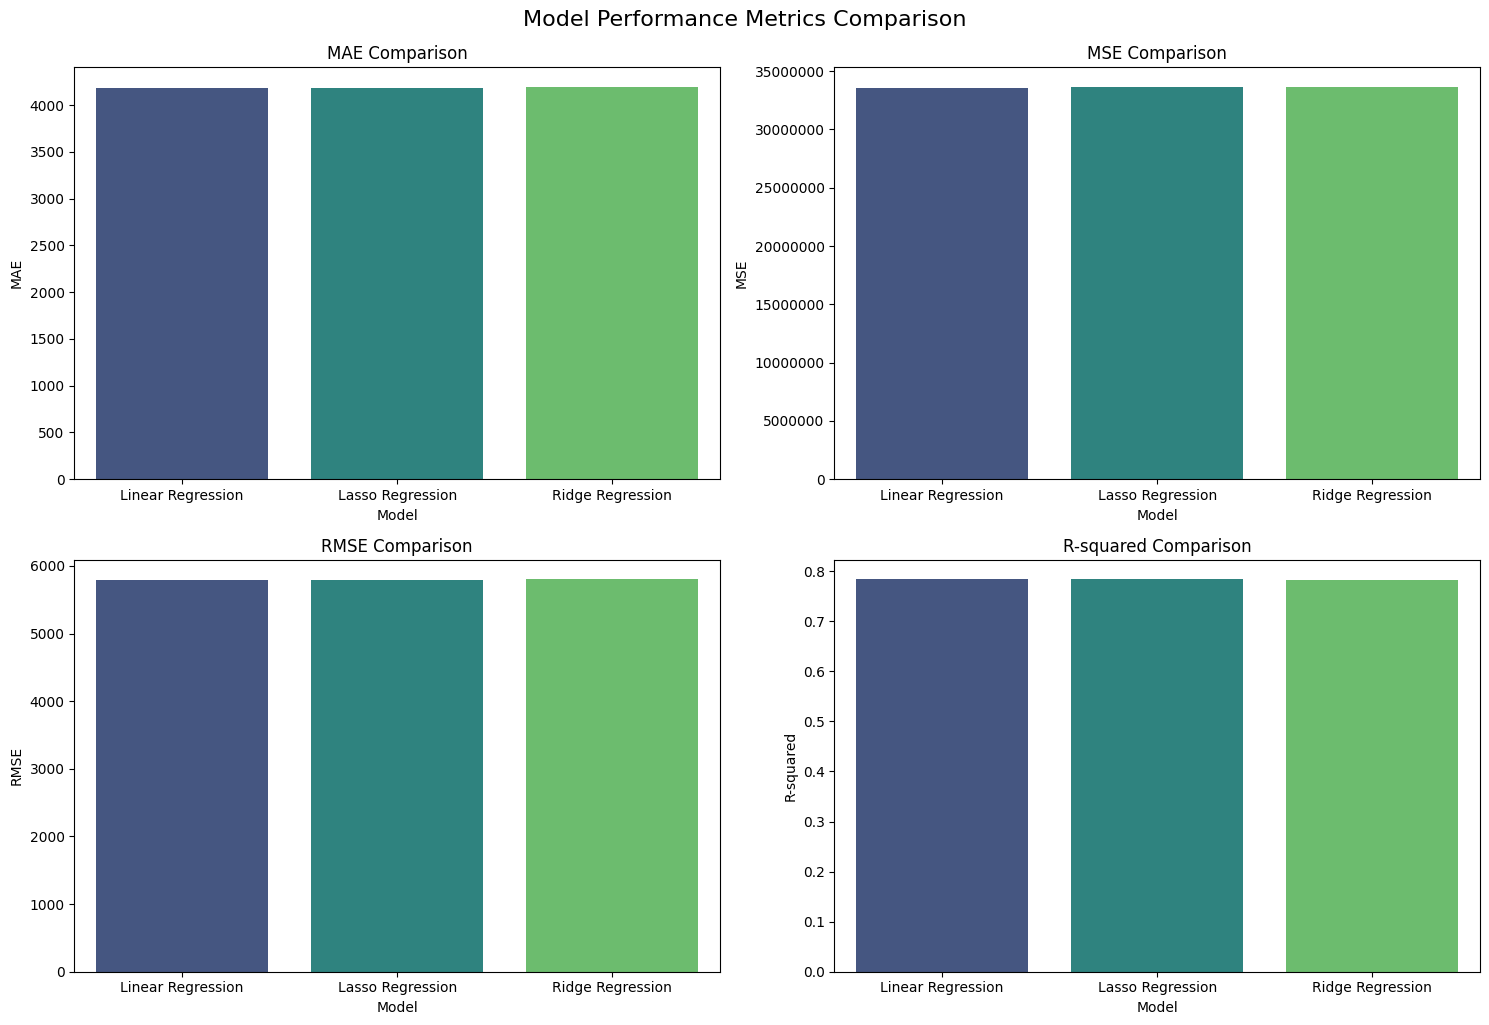

Visual comparison of model performance metrics displayed.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R-squared']

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x='Model', y='Score', data=metrics_melted[metrics_melted['Metric'] == metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].ticklabel_format(style='plain', axis='y') # Prevent scientific notation for large numbers

plt.tight_layout()
plt.suptitle('Model Performance Metrics Comparison', y=1.02, fontsize=16)
plt.show()

print("Visual comparison of model performance metrics displayed.")

**Reasoning**:
The previous code block generated `FutureWarning` messages because `palette` was used without explicitly assigning `hue` in `sns.barplot`. To address this, I will explicitly set `hue='Model'` and `legend=False` as suggested by the warning.



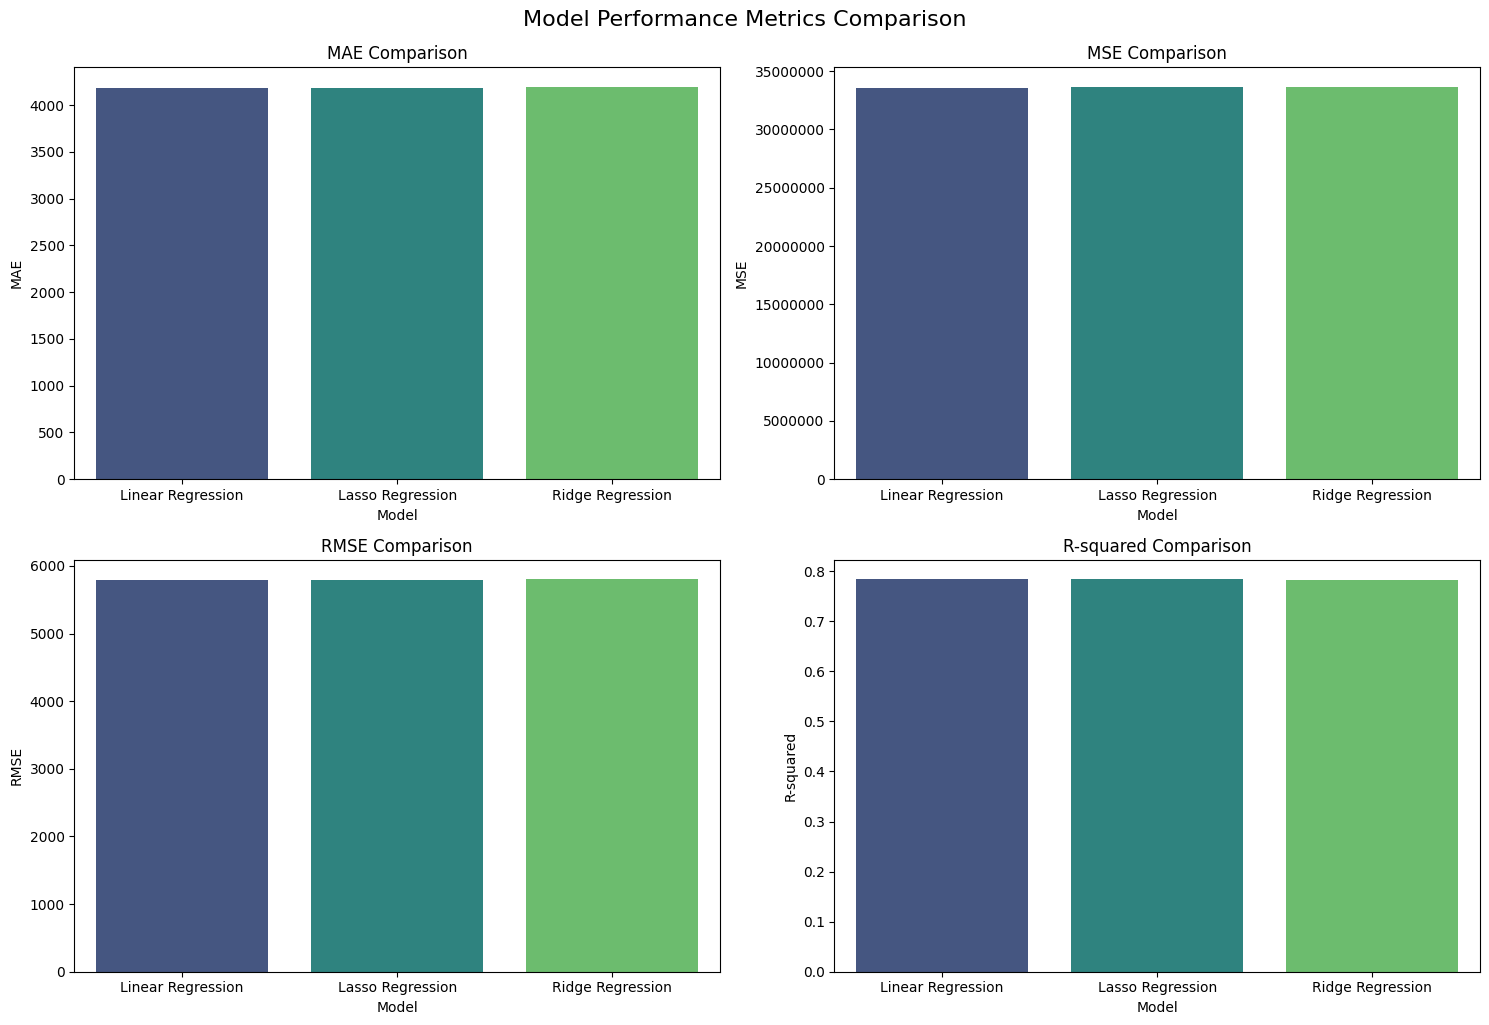

Visual comparison of model performance metrics displayed.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R-squared']

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x='Model', y='Score', hue='Model', data=metrics_melted[metrics_melted['Metric'] == metric], ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].ticklabel_format(style='plain', axis='y') # Prevent scientific notation for large numbers

plt.tight_layout()
plt.suptitle('Model Performance Metrics Comparison', y=1.02, fontsize=16)
plt.show()

print("Visual comparison of model performance metrics displayed.")

## Visualize Model Performance

### Subtask:
Generate visualizations, such as scatter plots of actual vs. predicted values for each model, to graphically compare their performance. Provide a clear legend for any plots.


**Reasoning**:
To visualize the actual vs. predicted values for each model, I will create a figure with three subplots, one for each model. Each subplot will contain a scatter plot of `y_test` against the model's predictions, a diagonal line representing perfect predictions, and appropriate labels and titles to compare their performance.



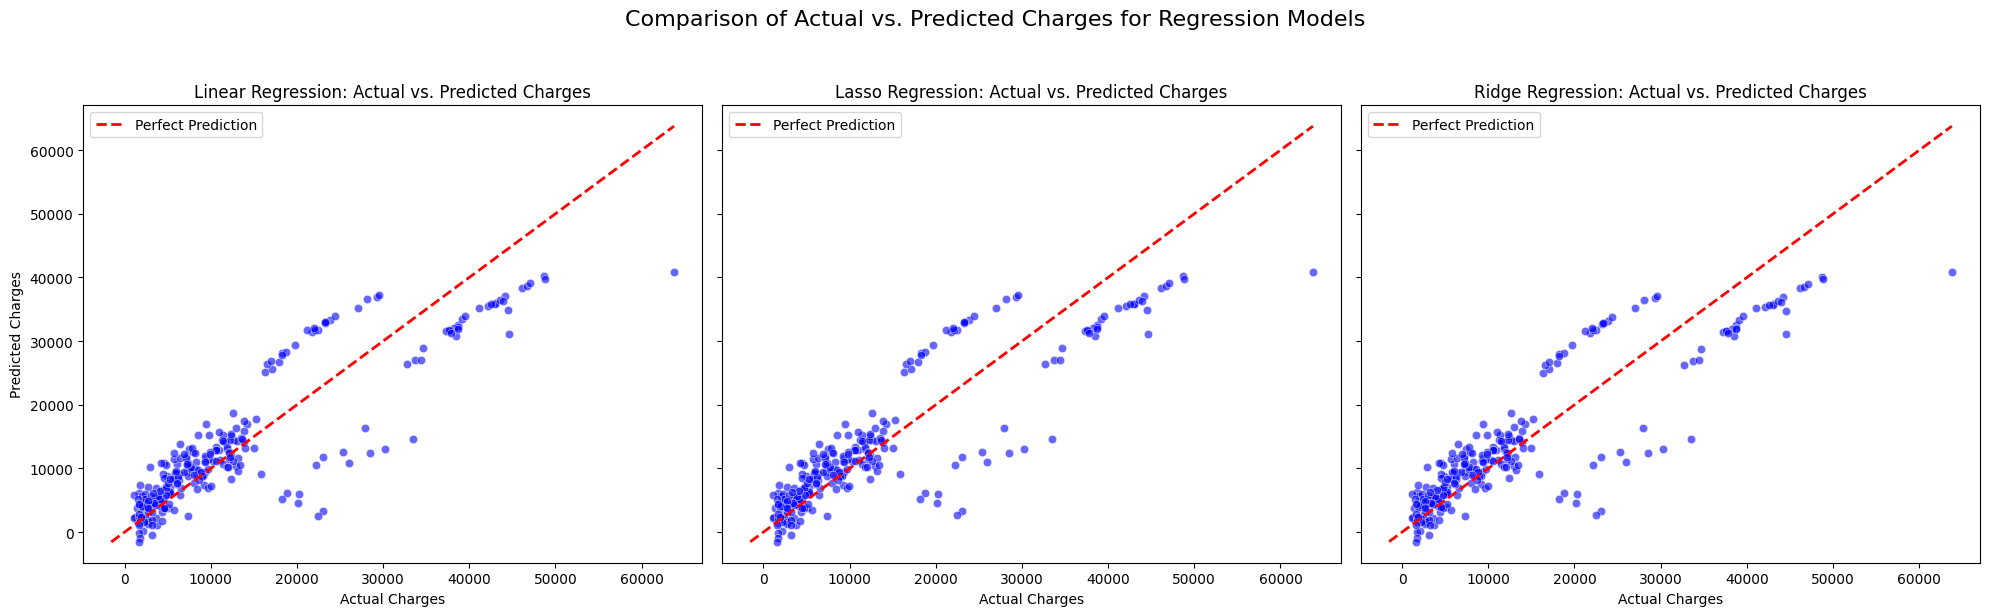

Visualizations of actual vs. predicted charges for each model displayed.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure with three subplots for actual vs. predicted values
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)
axes = axes.flatten()

predictions = {
    'Linear Regression': y_pred_lr,
    'Lasso Regression': y_pred_lasso,
    'Ridge Regression': y_pred_ridge
}

model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']

for i, (model_name, y_pred) in enumerate(predictions.items()):
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[i], alpha=0.6, color='blue')

    # Add a diagonal line for perfect predictions
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')

    axes[i].set_title(f'{model_name}: Actual vs. Predicted Charges')
    axes[i].set_xlabel('Actual Charges')
    axes[i].set_ylabel('Predicted Charges')
    axes[i].legend()

plt.suptitle('Comparison of Actual vs. Predicted Charges for Regression Models', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

print("Visualizations of actual vs. predicted charges for each model displayed.")

## Final Task

### Subtask:
Summarize the findings, discussing the strengths and weaknesses of each regression model based on the evaluation metrics and visualizations, and conclude which model performed best for this dataset.


## Summary:

### Q&A
The task asked to summarize the findings, discuss the strengths and weaknesses of each regression model, and conclude which model performed best.

*   **Strengths and Weaknesses of Each Model:**
    *   **Strengths (common to all models):** All three models (Linear Regression, Lasso Regression, Ridge Regression) achieved a respectable R-squared value of 0.78. This indicates that approximately 78% of the variance in insurance charges can be explained by the input features. Visually, they show a reasonable fit, particularly for lower and moderate insurance charges, clustering around the perfect prediction line.
    *   **Weaknesses (common to all models):** The performance metrics (MAE, MSE, RMSE, R-squared) were almost identical across all three models. This suggests that the regularization applied by Lasso and Ridge Regression with the default `alpha=1.0` did not significantly improve or differentiate their performance compared to standard Linear Regression on this dataset. Furthermore, the visualizations show increased scatter and less accurate predictions for higher insurance charges, indicating the models struggle to accurately predict very high-cost cases.
*   **Best Performing Model:** Based on the evaluation metrics with the specified parameters, all three models performed almost identically. Linear Regression showed marginally superior performance with a slightly lower Mean Absolute Error (\$4181.19), Mean Squared Error (\$33596915.85), and Root Mean Squared Error (\$5796.28) compared to Lasso and Ridge Regression. However, the differences are negligible, suggesting no single model dramatically outperforms the others under these conditions.

### Data Analysis Key Findings

*   The dataset contains 1338 entries and 7 columns, with no missing values. Key numerical features include `age`, `bmi`, `children`, and the target variable `charges`. Categorical features are `sex`, `smoker`, and `region`.
*   Insurance `charges` show a wide range, from \$1121.87 to \$63770.43, with a mean of approximately \$13270.42.
*   Data preprocessing involved separating features and the target, one-hot encoding categorical variables (`sex`, `smoker`, `region`), splitting the dataset into 80% training (1070 samples) and 20% testing (268 samples) sets, and standardizing numerical features (`age`, `bmi`, `children`).
*   All three regression models (Linear Regression, Lasso Regression with $\alpha=1.0$, and Ridge Regression with $\alpha=1.0$) yielded nearly identical performance metrics on the test set:
    *   **R-squared:** Consistent at 0.78 for all models.
    *   **Mean Absolute Error (MAE):** Linear Regression (\$4181.19), Lasso Regression (\$4182.22), Ridge Regression (\$4193.20).
    *   **Root Mean Squared Error (RMSE):** Linear Regression (\$5796.28), Lasso Regression (\$5797.04), Ridge Regression (\$5800.46).
*   Visualizations of actual versus predicted charges further confirmed the similar performance across models, with predictions generally following the actual values, though with more dispersion for higher charge amounts.

### Insights or Next Steps

*   **Hyperparameter Tuning:** Systematically tune the regularization strength ($\alpha$) for Lasso and Ridge Regression to explore if different values can lead to a more significant difference in model performance or feature selection, especially given the current default of $\alpha=1.0$ produced very similar results to linear regression.
*   **Advanced Modeling and Feature Engineering:** Consider exploring more complex regression models (e.g., Gradient Boosting, Random Forest) or performing additional feature engineering to capture non-linear relationships or interactions between features, which might improve predictions, particularly for higher insurance charges where current models show greater variance.
